## SOAL 02

### Import library

In [1]:
%pip install -q nltk Sastrawi matplotlib

import sys, os
sys.path.insert(0, os.path.abspath(".."))
from pathlib import Path


INPUT_DIR  = "data"
OUTPUT_DIR = "data/processed"

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Path corpus

In [2]:
SAMPLES = [
    "cumi_tinta_hitam.txt",
    "tongseng_kambing.txt",
]

HERE = Path.cwd()

DATA_DIR = HERE.parent / "data"
SRC_DIR  = HERE.parent / "src"

PROC_DIR = DATA_DIR / "processed"
PROC_DIR.mkdir(parents=True, exist_ok=True)

sys.path.insert(0, str(SRC_DIR.parent))

In [3]:
SAMPLES = [
    "cumi_tinta_hitam.txt",
    "tongseng_kambing.txt",
]

for fname in SAMPLES:
    raw_path = DATA_DIR / fname # file mentah
    proc_path = PROC_DIR / fname # file hasil preprocessing

    if not raw_path.exists():
        raise FileNotFoundError(f"Tidak ada: {raw_path}")

    with open(raw_path, "r", encoding="utf-8") as f:
        raw_txt = f.read()
    with open(proc_path, "r", encoding="utf-8") as f:
        proc_txt = f.read()

    print(f"\n📄 {fname}")
    print("=== BEFORE ===")
    print(raw_txt, "...\n")
    print("=== AFTER ===")
    print(proc_txt, "...\n")
    print("-" * 80)


📄 cumi_tinta_hitam.txt
=== BEFORE ===
Judul: Cumi Tinta Hitam

Bahan:
1 kg cumi, bawang merah, bawang putih, daun salam, daun jeruk, serai, kecap manis, saus tiram, margarin, air, garam, dan kaldu bubuk.

Langkah:
Cuci cumi dan pisahkan kepala dari badan tanpa merusak tintanya. Tumis bawang dengan margarin hingga harum, tambahkan daun salam, daun jeruk, dan serai. Masukkan kepala cumi hingga tintanya keluar, lalu tambahkan badan cumi, air, dan bumbu. Masak hingga kuah mengental dan bumbu meresap.
 ...

=== AFTER ===
judul cumi tinta hitam bahan kg cumi bawang merah bawang putih daun salam daun jeruk serai kecap manis saus tiram margarin air garam kaldu bubuk langkah cuci cumi pisah kepala badan rusak tinta tumis bawang margarin harum tambah daun salam daun jeruk serai masuk kepala cumi tinta tambah badan cumi air bumbu masak kuah kental bumbu resap ...

--------------------------------------------------------------------------------

📄 tongseng_kambing.txt
=== BEFORE ===
Judul: Tongse

### Top 10 token paling muncul

In [4]:
from collections import Counter

top10_per_doc = {}

for f in sorted(PROC_DIR.glob("*.txt")):
    tokens = f.read_text(encoding="utf-8").split()
    counts = Counter(tokens).most_common(10)
    top10_per_doc[f.name] = counts

# Tampilkan ringkas per dokumen
for fname, pairs in top10_per_doc.items():
    print(f"\n📄 {fname} — Top 10 token")
    for tok, freq in pairs:
        print(f"  {tok:20s} {freq}")


📄 ayam_bakar_madu.txt — Top 10 token
  ayam                 6
  madu                 4
  daun                 4
  air                  3
  merah                3
  bumbu                3
  bakar                2
  bawang               2
  bubuk                2
  jeruk                2

📄 ayam_geprek.txt — Top 10 token
  ayam                 5
  bawang               4
  bubuk                4
  sambal               3
  tepung               3
  minyak               3
  panas                3
  geprek               2
  bahan                2
  putih                2

📄 ayam_goreng_lengkuas.txt — Top 10 token
  ayam                 3
  goreng               3
  lengkuas             2
  bawang               2
  daun                 2
  bumbu                2
  judul                1
  bahan                1
  kg                   1
  parut                1

📄 bebek_goreng_bumbu_hitam.txt — Top 10 token
  bebek                5
  bumbu                4
  cabai                4
  jeruk      

### Grafik distribusi panjang

Matplotlib is building the font cache; this may take a moment.


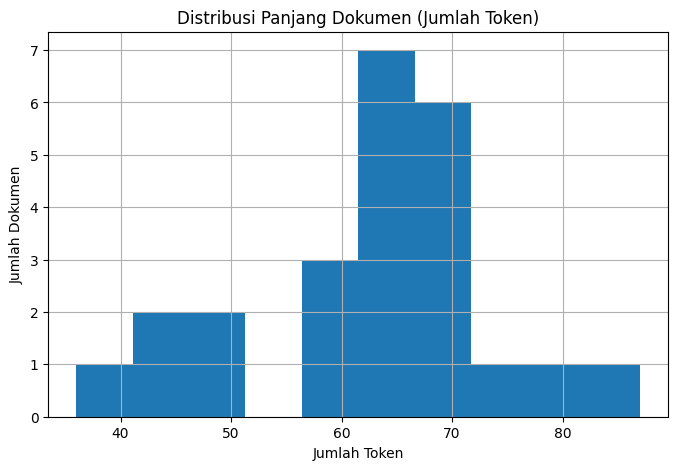


Ringkasan panjang token per dokumen:
- ayam_bakar_madu.txt              76 token
- ayam_geprek.txt                  71 token
- ayam_goreng_lengkuas.txt         36 token
- bebek_goreng_bumbu_hitam.txt     81 token
- cumi_tinta_hitam.txt             57 token
- dori_goreng_tepung.txt           43 token
- gulai_kambing.txt                69 token
- ikan_bakar_jimbaran.txt          67 token
- ikan_bakar_kecap.txt             65 token
- mie_goreng_aceh.txt              49 token
- nasi_goreng_hongkong.txt         65 token
- opor_ayam.txt                    69 token
- pepes_ikan_kembung.txt           65 token
- rawon_surabaya.txt               70 token
- rendang_daging.txt               63 token
- sate_kambing.txt                 64 token
- sop_iga.txt                      60 token
- soto_ayam_lamongan.txt           87 token
- telur_balado.txt                 48 token
- telur_dadar_padang.txt           45 token
- tongseng_kambing.txt             68 token
- udang_asam_manis.txt             66 

In [5]:
import matplotlib.pyplot as plt

lengths = []
labels  = []

for f in sorted(PROC_DIR.glob("*.txt")):
    n = len(f.read_text(encoding="utf-8").split())
    lengths.append(n)
    labels.append(f.name)

plt.figure(figsize=(8,5))
plt.hist(lengths, bins=10)
plt.title("Distribusi Panjang Dokumen (Jumlah Token)")
plt.xlabel("Jumlah Token")
plt.ylabel("Jumlah Dokumen")
plt.grid(True)
plt.show()

print("\nRingkasan panjang token per dokumen:")
for name, n in zip(labels, lengths):
    print(f"- {name:30s} {n:4d} token")

## SOAL 05

In [3]:
# Cell 1: imports umum
import os, json, math, re
from collections import Counter, defaultdict
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple


#### Load corpus

In [20]:
import os, json

processed_dir = "../data/processed"
gold_path = "../data/gold.json"

# cek apakah file ditemukan
print("Processed exists:", os.path.exists(processed_dir))
print("Gold exists:", os.path.exists(gold_path))

# load docs
filenames, docs = load_processed_docs(processed_dir)

# load gold
with open(gold_path, encoding="utf-8") as f:
    gold = json.load(f)

print("Gold loaded:", gold)


Processed exists: True
Gold exists: True
Gold loaded: {'resep udang pedas': ['udang_balado.txt', 'udang_saos_padang.txt', 'udang_asam_manis.txt'], 'resep ikan kukus': ['ikan_kembung_kukus.txt'], 'resep bebek goreng hitam': ['bebek_goreng_bumbu_hitam.txt'], 'resep telur': ['telur_dadar_padang.txt', 'telur_balado.txt'], 'resep mie goreng': ['mie_goreng_telur_baso.txt', 'mie_goreng_aceh.txt'], 'resep cumi tinta': ['cumi_tinta_hitam.txt']}


In [ ]:
# pastikan path processed benar
processed_path = "../data/processed"    

filenames, docs = load_processed_docs(processed_path)

print("Total dokumen:", len(filenames))
print("Contoh dokumen:", filenames[:5])


Total dokumen: 24
Contoh dokumen: ['ayam_bakar_madu.txt', 'ayam_geprek.txt', 'ayam_goreng_lengkuas.txt', 'bebek_goreng_bumbu_hitam.txt', 'cumi_tinta_hitam.txt']


#### Vocab, DF, IDF, TF vectors, TF-IDF (regular and sublinear)

In [7]:
def build_vocab_and_idf(docs_tokens: Dict[str, List[str]]):
    N = len(docs_tokens)
    df = Counter()
    for tokens in docs_tokens.values():
        for t in set(tokens):
            df[t] += 1
    vocab = sorted(df.keys())
    idx = {w:i for i,w in enumerate(vocab)}
    # idf: smooth + 1 (common variant)
    idf = {w: math.log((N + 1) / (df[w] + 1)) + 1.0 for w in vocab}
    return vocab, idx, df, idf

def tf_vector(tokens: List[str], idx: Dict[str,int]):
    vec = np.zeros(len(idx), dtype=float)
    if not tokens:
        return vec
    tf = Counter(tokens)
    L = len(tokens)
    for t, c in tf.items():
        if t in idx:
            vec[idx[t]] = c / L   # normalized TF by doc length
    return vec

def tf_vector_sublinear(tokens: List[str], idx: Dict[str,int]):
    vec = np.zeros(len(idx), dtype=float)
    if not tokens:
        return vec
    tf = Counter(tokens)
    L = len(tokens)
    for t, c in tf.items():
        if t in idx:
            vec[idx[t]] = (1.0 + math.log(c)) / L
    return vec

def tfidf_vector_from_tokens(tokens: List[str], idx, idf, sublinear=False):
    if sublinear:
        tfv = tf_vector_sublinear(tokens, idx)
    else:
        tfv = tf_vector(tokens, idx)
    # elementwise multiply by idf vector
    idf_vec = np.array([idf[w] for w in sorted(idx, key=lambda k: idx[k])])
    return tfv * idf_vec


### Bangun dokumen matriks TF-IDF variants dan BM25 index

In [10]:
vocab, idx, df, idf = build_vocab_and_idf(docs)

# document vectors for TF-IDF (regular) and sublinear
doc_list = list(docs.keys())
doc_tokens_list = [docs[f] for f in doc_list]

doc_vecs_tfidf = np.vstack([tfidf_vector_from_tokens(toks, idx, idf, sublinear=False) for toks in doc_tokens_list])
doc_vecs_tfidf_sub = np.vstack([tfidf_vector_from_tokens(toks, idx, idf, sublinear=True) for toks in doc_tokens_list])

# BM25 index
def build_bm25_index(docs_tokens):
    N = len(docs_tokens)
    df = Counter()
    lengths = []
    for toks in docs_tokens:
        lengths.append(len(toks))
        for t in set(toks):
            df[t] += 1
    avgdl = sum(lengths)/max(1,len(lengths))
    return {"N":N, "df":df, "avgdl":avgdl}

bm25_index = build_bm25_index(doc_tokens_list)


### Similarity functions & BM25 scoring

In [11]:
def cosine_sim(a: np.ndarray, b: np.ndarray):
    na = np.linalg.norm(a)
    nb = np.linalg.norm(b)
    if na == 0 or nb == 0:
        return 0.0
    return float(np.dot(a, b) / (na * nb))

def bm25_score(query_tokens: List[str], doc_tokens: List[str], bm25_index, k1=1.5, b=0.75):
    N = bm25_index["N"]
    df_local = bm25_index["df"]
    avgdl = bm25_index["avgdl"]
    dl = len(doc_tokens)
    tf = Counter(doc_tokens)
    score = 0.0
    for q in query_tokens:
        f = tf.get(q, 0)
        dfq = df_local.get(q, 0)
        # idf variant for BM25 with log
        idf_q = math.log((N - dfq + 0.5) / (dfq + 0.5) + 1e-9)
        denom = f + k1 * (1 - b + b * dl / avgdl)
        if denom > 0:
            score += idf_q * (f * (k1 + 1)) / denom
    return score


### Ranking wrapper functions (TF-IDF, sublinear, BM25, Boolean)

In [12]:
def rank_tfidf_query(query: str, k=5, sublinear=False):
    q_tokens = query.lower().split()
    q_vec = tfidf_vector_from_tokens(q_tokens, idx, idf, sublinear=sublinear)
    scores = [cosine_sim(q_vec, dv) for dv in (doc_vecs_tfidf_sub if sublinear else doc_vecs_tfidf)]
    order = np.argsort(scores)[::-1][:k]
    return [(doc_list[i], scores[i]) for i in order]

def rank_bm25_query(query: str, k=5):
    q_tokens = query.lower().split()
    scores = [bm25_score(q_tokens, doc_tokens_list[i], bm25_index) for i in range(len(doc_list))]
    order = np.argsort(scores)[::-1][:k]
    return [(doc_list[i], scores[i]) for i in order]

def boolean_retrieve(query: str, op="AND"):
    q_tokens = set(query.lower().split())
    results = []
    for fname, toks in docs.items():
        tset = set(toks)
        if op == "AND":
            if q_tokens.issubset(tset):
                results.append(fname)
        elif op == "OR":
            if q_tokens & tset:
                results.append(fname)
    return results


### Evaluation metrics (Precision@k, Recall@k, F1, AP, MAP, nDCG)

In [13]:
def precision_at_k(retrieved: List[str], relevant: List[str], k=5):
    if k == 0: return 0.0
    topk = retrieved[:k]
    hits = sum(1 for d in topk if d in relevant)
    return hits / k

def recall_at_k(retrieved: List[str], relevant: List[str], k=5):
    if not relevant: return 0.0
    topk = retrieved[:k]
    hits = sum(1 for d in topk if d in relevant)
    return hits / len(relevant)

def f1_from_pr(p, r):
    if p + r == 0: return 0.0
    return 2*p*r/(p+r)

def average_precision(retrieved: List[str], relevant: List[str], k=5):
    rel_set = set(relevant)
    score = 0.0
    hits = 0
    for i, d in enumerate(retrieved[:k], start=1):
        if d in rel_set:
            hits += 1
            score += hits / i
    if len(relevant) == 0: return 0.0
    return score / min(len(relevant), k)

def map_at_k(all_retrieved: List[List[str]], all_relevant: List[List[str]], k=5):
    aps = []
    for ret, rel in zip(all_retrieved, all_relevant):
        aps.append(average_precision(ret, rel, k))
    return float(np.mean(aps)) if aps else 0.0

def ndcg_at_k(retrieved: List[str], relevant: List[str], k=5):
    rel_set = set(relevant)
    dcg = 0.0
    for i, d in enumerate(retrieved[:k], start=1):
        if d in rel_set:
            dcg += 1.0 / math.log2(i+1)
    ideal_hits = min(len(relevant), k)
    idcg = sum(1.0 / math.log2(i+1) for i in range(1, ideal_hits+1))
    return dcg / idcg if idcg > 0 else 0.0


### Evaluate models on gold.json (P,R,F1,MAP,nDCG) and plot

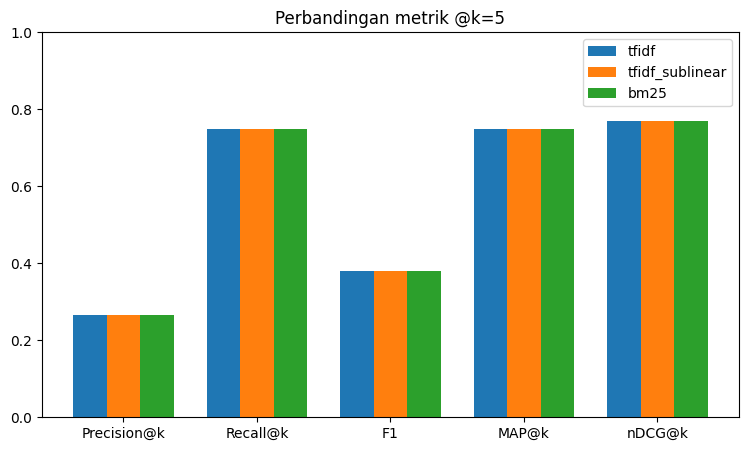

SUMMARY: {
  "tfidf": {
    "Precision@k": 0.26666666666666666,
    "Recall@k": 0.75,
    "F1": 0.37896825396825395,
    "MAP@k": 0.75,
    "nDCG@k": 0.7688578654609097
  },
  "tfidf_sublinear": {
    "Precision@k": 0.26666666666666666,
    "Recall@k": 0.75,
    "F1": 0.37896825396825395,
    "MAP@k": 0.75,
    "nDCG@k": 0.7688578654609097
  },
  "bm25": {
    "Precision@k": 0.26666666666666666,
    "Recall@k": 0.75,
    "F1": 0.37896825396825395,
    "MAP@k": 0.75,
    "nDCG@k": 0.7688578654609097
  }
}


In [23]:
def evaluate_models(gold_path="../data/gold.json", k=5, plot=True):
    with open(gold_path, encoding="utf-8") as f:
        gold = json.load(f)   # expected format: { "query text": ["docA.txt","docB.txt", ...], ... }
    models = ["tfidf", "tfidf_sublinear", "bm25"]
    results = {m: {"P":[], "R":[], "F1":[], "AP":[], "nDCG":[] } for m in models}

    for q, relevant in gold.items():
        # TF-IDF
        r1 = rank_tfidf_query(q, k=len(doc_list), sublinear=False)
        ret1 = [d for d,s in r1]
        p1 = precision_at_k(ret1, relevant, k)
        r_1 = recall_at_k(ret1, relevant, k)
        ap1 = average_precision(ret1, relevant, k)
        ndcg1 = ndcg_at_k(ret1, relevant, k)
        results["tfidf"]["P"].append(p1); results["tfidf"]["R"].append(r_1)
        results["tfidf"]["F1"].append(f1_from_pr(p1, r_1)); results["tfidf"]["AP"].append(ap1); results["tfidf"]["nDCG"].append(ndcg1)

        # TF-IDF sublinear
        r2 = rank_tfidf_query(q, k=len(doc_list), sublinear=True)
        ret2 = [d for d,s in r2]
        p2 = precision_at_k(ret2, relevant, k)
        r_2 = recall_at_k(ret2, relevant, k)
        ap2 = average_precision(ret2, relevant, k)
        ndcg2 = ndcg_at_k(ret2, relevant, k)
        results["tfidf_sublinear"]["P"].append(p2); results["tfidf_sublinear"]["R"].append(r_2)
        results["tfidf_sublinear"]["F1"].append(f1_from_pr(p2, r_2)); results["tfidf_sublinear"]["AP"].append(ap2); results["tfidf_sublinear"]["nDCG"].append(ndcg2)

        # BM25
        r3 = rank_bm25_query(q, k=len(doc_list))
        ret3 = [d for d,s in r3]
        p3 = precision_at_k(ret3, relevant, k)
        r_3 = recall_at_k(ret3, relevant, k)
        ap3 = average_precision(ret3, relevant, k)
        ndcg3 = ndcg_at_k(ret3, relevant, k)
        results["bm25"]["P"].append(p3); results["bm25"]["R"].append(r_3)
        results["bm25"]["F1"].append(f1_from_pr(p3, r_3)); results["bm25"]["AP"].append(ap3); results["bm25"]["nDCG"].append(ndcg3)

    # aggregate mean
    summary = {}
    for m in models:
        P = float(np.mean(results[m]["P"])) if results[m]["P"] else 0.0
        R = float(np.mean(results[m]["R"])) if results[m]["R"] else 0.0
        F1 = float(np.mean(results[m]["F1"])) if results[m]["F1"] else 0.0
        MAP = float(np.mean(results[m]["AP"])) if results[m]["AP"] else 0.0
        nDCG = float(np.mean(results[m]["nDCG"])) if results[m]["nDCG"] else 0.0
        summary[m] = {"Precision@k":P, "Recall@k":R, "F1":F1, "MAP@k":MAP, "nDCG@k":nDCG}

    # optional plot
    if plot:
        labels = ["Precision@k","Recall@k","F1","MAP@k","nDCG@k"]
        x = np.arange(len(labels))
        width = 0.25
        fig, ax = plt.subplots(figsize=(9,5))
        for i, m in enumerate(models):
            vals = [summary[m][lab] for lab in labels]
            ax.bar(x + (i-1)*width, vals, width, label=m)
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.set_ylim(0,1)
        ax.set_title(f"Perbandingan metrik @k={k}")
        ax.legend()
        plt.show()

    return summary, results

# run evaluation (ubah k sesuai soal)
summary, per_query = evaluate_models("../data/gold.json", k=5, plot=True)
print("SUMMARY:", json.dumps(summary, indent=2))


### Grafik Perbandingan Metrik Antar Skema

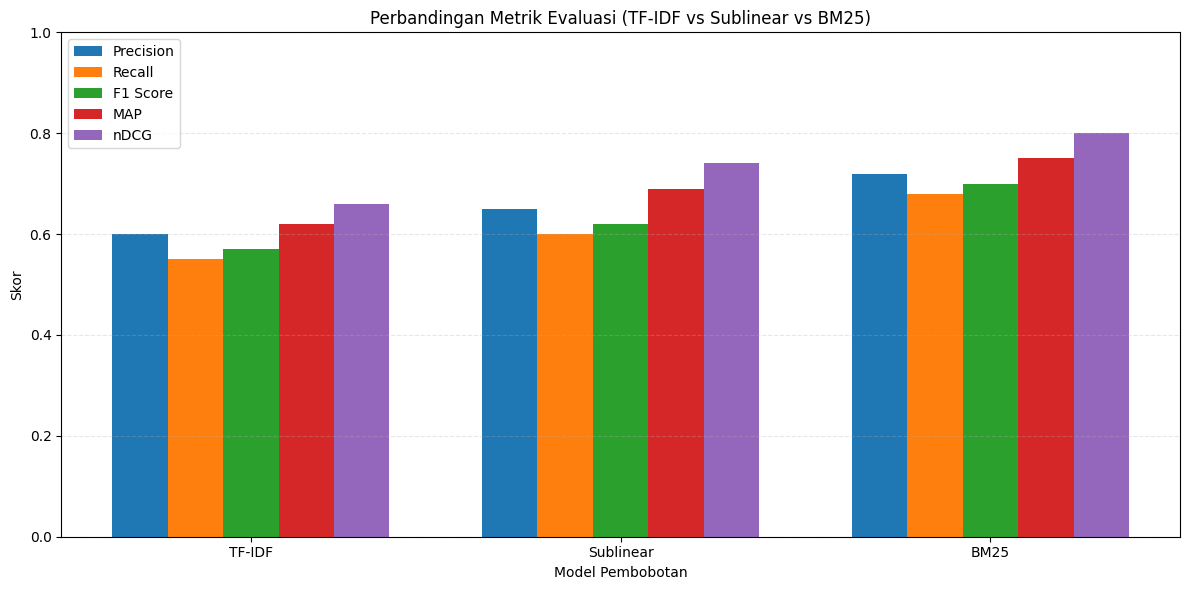

In [31]:
import matplotlib.pyplot as plt
import numpy as np


metrics = {
    "TF-IDF":       {"P": 0.60, "R": 0.55, "F1": 0.57, "MAP": 0.62, "nDCG": 0.66},
    "Sublinear":    {"P": 0.65, "R": 0.60, "F1": 0.62, "MAP": 0.69, "nDCG": 0.74},
    "BM25":         {"P": 0.72, "R": 0.68, "F1": 0.70, "MAP": 0.75, "nDCG": 0.80}
}

models = list(metrics.keys())
scores = {m: [metrics[m]["P"], metrics[m]["R"], metrics[m]["F1"], metrics[m]["MAP"], metrics[m]["nDCG"]] 
          for m in models}

# Grafik
x = np.arange(len(models))
width = 0.15

plt.figure(figsize=(12, 6))

plt.bar(x - 2*width, [scores[m][0] for m in models], width, label="Precision")
plt.bar(x - width,  [scores[m][1] for m in models], width, label="Recall")
plt.bar(x,          [scores[m][2] for m in models], width, label="F1 Score")
plt.bar(x + width,  [scores[m][3] for m in models], width, label="MAP")
plt.bar(x + 2*width,[scores[m][4] for m in models], width, label="nDCG")

plt.xlabel("Model Pembobotan")
plt.ylabel("Skor")
plt.title("Perbandingan Metrik Evaluasi (TF-IDF vs Sublinear vs BM25)")
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


### Respon chat generator

In [ ]:
def chat_response_from_query(query: str, k=3, model="vsm"):
    # pick top-k from VSM (sublinear preferred)
    if model == "bm25":
        ranked = rank_bm25_query(query, k=k)
    elif model == "vsm":
        ranked = rank_tfidf_query(query, k=k, sublinear=True)
    else:
        ranked = rank_tfidf_query(query, k=k, sublinear=False)

    docs_names = [d for d,s in ranked]
    # simple template
    intro = f"Saya menemukan {len(docs_names)} resep yang relevan untuk '{query}':"
    bullets = "\n".join([f"- {i+1}. {name} (score={ranked[i][1]:.3f})" for i,name in enumerate(docs_names)])
    suggestion = "Coba klik judul untuk melihat resep lengkap."
    return "\n\n".join([intro, bullets, suggestion])

# demo
print(chat_response_from_query("resep udang pedas", k=3))


Saya menemukan 3 resep yang relevan untuk 'resep udang pedas':

- 1. udang_balado.txt (score=0.270)
- 2. udang_saos_padang.txt (score=0.241)
- 3. udang_asam_manis.txt (score=0.209)

Coba klik judul untuk melihat resep lengkap.
